In [1]:
import matplotlib.pyplot as plt

In [2]:
def needleman_wunsch(seq1, seq2, match=2, mismatch=-1, gap=-2):

  # Initialize the score and traceback matrices
  rows = len(seq1) + 1
  cols = len(seq2) + 1
  score_matrix = [[0] * cols for _ in range(rows)]
  traceback_matrix = [[0] * cols for _ in range(rows)]

  # Initialize the first row and column of the score matrix
  for i in range(1, rows):
    score_matrix[i][0] = score_matrix[i-1][0] + gap
    traceback_matrix[i][0] = 'up'

  for j in range(1, cols):
    score_matrix[0][j] = score_matrix[0][j-1] + gap
    traceback_matrix[0][j] = 'left'

  # Fill the score and traceback matrices
  for i in range(1, rows):
    for j in range(1, cols):
      if seq1[i-1] == seq2[j-1]:
        diagonal_score = score_matrix[i-1][j-1] + match
      else:
        diagonal_score = score_matrix[i-1][j-1] + mismatch

      up_score = score_matrix[i-1][j] + gap
      left_score = score_matrix[i][j-1] + gap

      max_score = max(diagonal_score, up_score, left_score)
      score_matrix[i][j] = max_score

      if max_score == diagonal_score:
        traceback_matrix[i][j] = 'diagonal'
      elif max_score == up_score:
        traceback_matrix[i][j] = 'up'
      else:
        traceback_matrix[i][j] = 'left'

  # Traceback to find the alignments
  alignments = []

  def traceback(i, j, alignment1, alignment2):
    if i == 0 and j == 0:
      alignments.append((alignment1, alignment2))
      return
    if traceback_matrix[i][j] == 'diagonal':
      traceback(i-1, j-1, seq1[i-1] + alignment1, seq2[j-1] + alignment2)
    elif traceback_matrix[i][j] == 'up':
      traceback(i-1, j, seq1[i-1] + alignment1, '-' + alignment2)
    else:
      traceback(i, j-1, '-' + alignment1, seq2[j-1] + alignment2)

  traceback(rows - 1, cols - 1, '', '')

  return score_matrix, traceback_matrix, alignments


def plot_score_matrix(score_matrix, alignments, seq1, seq2):

    fig, ax = plt.subplots(dpi=150, figsize=(6, 2.5))
    ax.set_axis_off()  # Turn off the axis

    # Create the table
    table = ax.table(cellText=score_matrix,
                     rowLabels=[""] + list(seq1),
                     colLabels=[""] + list(seq2),
                     loc='center' )

    # Modify font size
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # Scale the table
    table.scale(1.5, 1.5)

    plt.show()
    print("Maximum Score:", score_matrix[-1][-1])
    print("Alignments:")
    for alignment in alignments:
        print(alignment[0])
        print(alignment[1])
        print()

def run(seq1, seq2):
    score_matrix, traceback_matrix, alignments = needleman_wunsch(seq1, seq2)
    plot_score_matrix(score_matrix, alignments, seq1, seq2)

In [3]:
seq11 = "TCTGC"
seq12 = "ACTGACCA"
seq21 = "C"
seq22 = "C"
seq31 = "TCTGC"
seq32 = "TGAC"


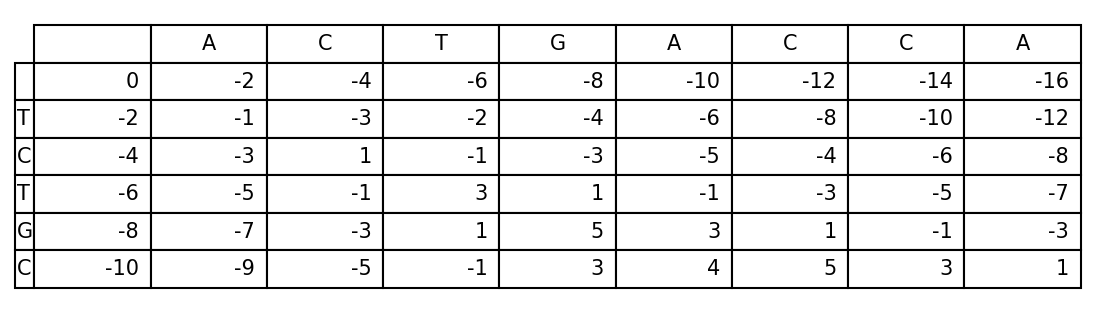

Maximum Score: 1
Alignments:
TCTG--C-
ACTGACCA



In [4]:
run(seq11, seq12)

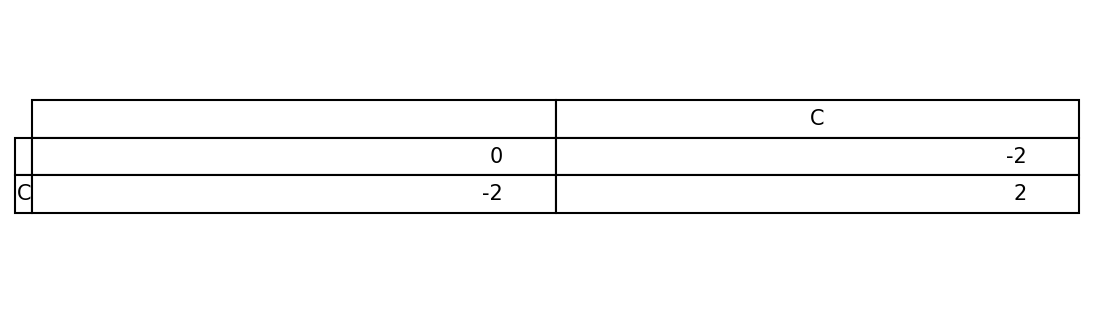

Maximum Score: 2
Alignments:
C
C



In [5]:
run(seq21, seq22)

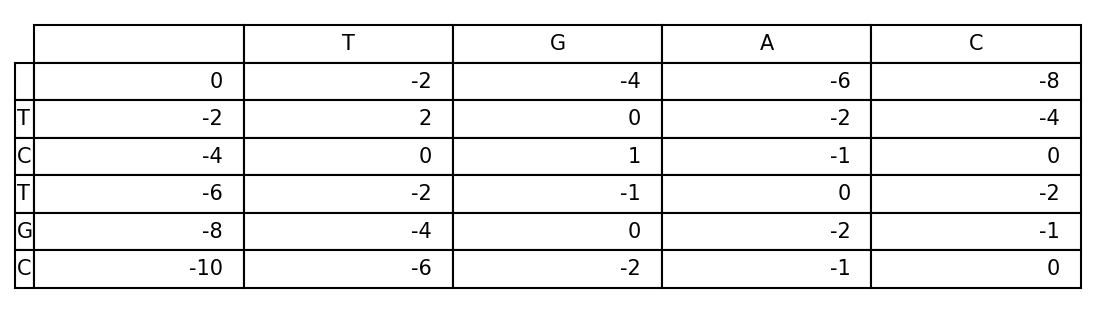

Maximum Score: 0
Alignments:
TCTGC
T-GAC



In [6]:
run(seq31, seq32)